In [2]:
from astropy.io import fits
from astropy.time import Time
from astropy.table import Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install h5py # needed for emcee, which is needed for radvel
!pip install radvel
from radvel.utils import timebin # needed for timebinning

     |████████████████████████████████| 4.0 MB 4.0 MB/s            
     |████████████████████████████████| 6.8 MB 4.2 MB/s            
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nbsphinx-0.9.3-py3-none-any.whl (31 kB)
  Using cached Cython-3.0.12-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.5 MB)
     |████████████████████████████████| 86 kB 11.8 MB/s            
     |████████████████████████████████| 47 kB 10.2 MB/s            
     |████████████████████████████████| 79 kB 13.0 MB/s            
  Preparing metadata (setup.py) ... done


  ERROR: Command errored out with exit status 1:
   command: /usr/local/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-6lqphm86/radvel_21dfa23ff99c44a0a91e64e98eab5c2f/setup.py'"'"'; __file__='"'"'/tmp/pip-install-6lqphm86/radvel_21dfa23ff99c44a0a91e64e98eab5c2f/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-gcj80bsf
       cwd: /tmp/pip-install-6lqphm86/radvel_21dfa23ff99c44a0a91e64e98eab5c2f/
  Complete output (49 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.6
  creating build/lib.linux-x86_64-3.6/radvel
  copying radvel/model.py -> build/lib.linux-x86_64-3.6/radvel
  copying radvel/orbit.py -> build/lib.linux-x8

/usr/local/lib/python3.6/site-packages/radvel/gp.py:33: ImportWarning: celerite not installed. GP kernals using celerite will not work. Try installing celerite using 'pip install celerite'
  Try installing celerite using 'pip install celerite'", ImportWarning)


In [3]:
L2_data_dir = '/data/data/L2/20241010/'

ObsIDs = ['KP.20241010.12030.25',
          'KP.20241010.12138.68',
          'KP.20241010.12247.28',
          'KP.20241010.12355.65',
          'KP.20241010.12464.09',
          'KP.20241010.12572.84',
          'KP.20241010.12681.19',
          'KP.20241010.12789.60',
          'KP.20241010.12898.04',
          'KP.20241010.13006.71',
          'KP.20241010.67445.58',
          'KP.20241010.67554.30',
          'KP.20241010.67662.93',
          'KP.20241010.67771.59',
          'KP.20241010.67879.99',
          'KP.20241010.67988.63',
          'KP.20241010.68097.02',
          'KP.20241010.68205.77',
          'KP.20241010.68314.15',
          'KP.20241010.68422.78'
]

In [4]:
L2 = fits.open(L2_data_dir + ObsIDs[0] + '_L2.fits')
L2.info()

Filename: /data/data/L2/20241010/KP.20241010.12030.25_L2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     496   ()      
  1  RECEIPT       1 BinTableHDU     29   2R x 10C   [26A, 6A, 7A, 40A, 3A, 14A, 1A, 43A, 71A, 4A]   
  2  CONFIG        1 BinTableHDU     13   0R x 2C   [D, D]   
  3  TELEMETRY     1 BinTableHDU     26   131R x 7C   [35A, 11A, 11A, 8A, 8A, 14A, 67A]   
  4  GREEN_CCF     1 ImageHDU        25   (804, 35, 5)   float64   
  5  RED_CCF       1 ImageHDU        25   (804, 32, 5)   float64   
  6  GREEN_CCF_RW    1 ImageHDU        25   (804, 35, 5)   float64   
  7  RED_CCF_RW    1 ImageHDU        25   (804, 32, 5)   float64   
  8  RV            1 BinTableHDU     88   67R x 21C   [D, D, D, D, D, K, K, D, D, D, D, D, D, D, D, 15A, 15A, 15A, 14A, 14A, D]   
  9  ACTIVITY      1 BinTableHDU      9   0R x 0C   []   


In [5]:
L2['PRIMARY'].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
FAVER   = '1.5     '           / Written by FITSAssemble version 1.5            
TIMESYS = 'UTC     '                                                            
CAMERAS =                    3 / Detectors in assembly request                  
GREEN   = 'YES     '           / Was this camera found?                         
RED     = 'YES     '           / Was this camera found?                         
CA_HK   = 'YES     '           / Was this camera found?                         
EXPMETER= 'NO      '           / Was this camera found?                         
GUIDE   = 'NO      '           / Was this camera found?                         
STARTIME= '2024-10-10T03:20:

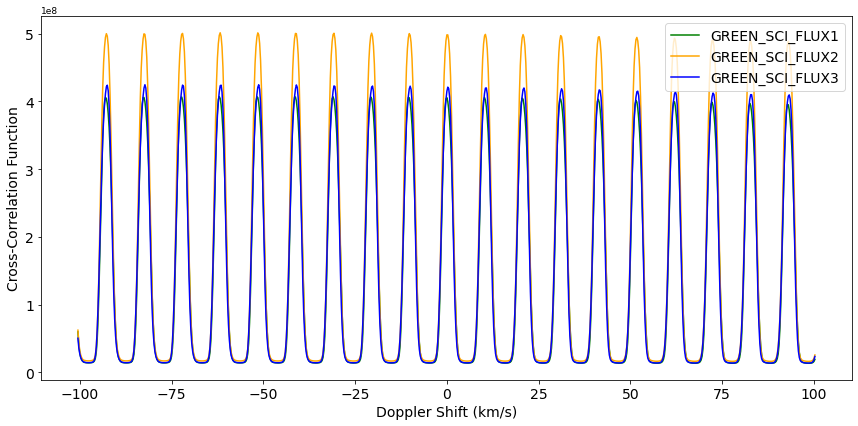

In [6]:
CCF_RV = L2['GREEN_CCF'].header['STARTV'] + \
         np.arange(L2['GREEN_CCF'].header['NAXIS1']) * L2['GREEN_CCF'].header['STEPV']
o = 18# order number
plt.figure(figsize=(12, 6), tight_layout=True)
plt.plot(CCF_RV, L2['GREEN_CCF'].data[0,o,:], color='g')
plt.plot(CCF_RV, L2['GREEN_CCF'].data[1,o,:], color='orange')
plt.plot(CCF_RV, L2['GREEN_CCF'].data[2,o,:], color='blue')
plt.legend(['GREEN_SCI_FLUX1', 'GREEN_SCI_FLUX2', 'GREEN_SCI_FLUX3'], fontsize=14, loc='best')
plt.xlabel('Doppler Shift (km/s)', fontsize=14)
plt.ylabel('Cross-Correlation Function', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

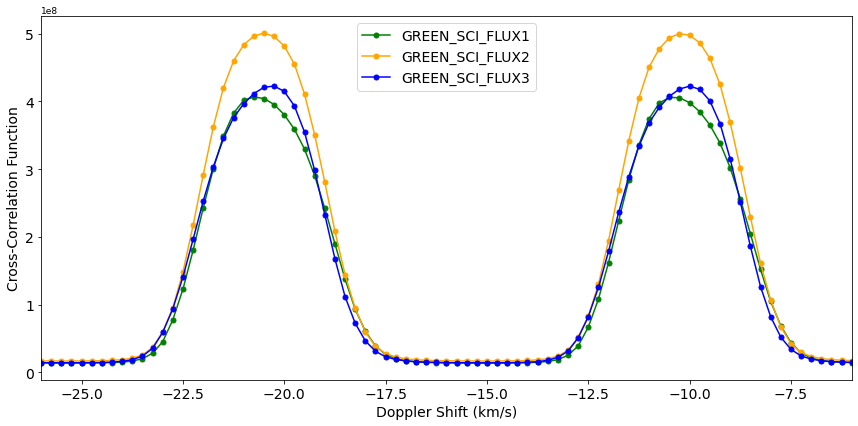

In [7]:
plt.figure(figsize=(12, 6), tight_layout=True)
plt.plot(CCF_RV, L2['GREEN_CCF'].data[0,o,:], '-o', color='g')
plt.plot(CCF_RV, L2['GREEN_CCF'].data[1,o,:], '-o', color='orange')
plt.plot(CCF_RV, L2['GREEN_CCF'].data[2,o,:], '-o', color='blue')
plt.axvline(x=L2['RV'].header['CCD1RV1'], color='g', label='CCD1RV1')
plt.axvline(x=L2['RV'].header['CCD1RV2'], color='orange', label='CCD1RV2')
plt.axvline(x=L2['RV'].header['CCD1RV3'], color='blue', label='CCD1RV3')
plt.legend(['GREEN_SCI_FLUX1', 'GREEN_SCI_FLUX2', 'GREEN_SCI_FLUX3'], fontsize=14, loc='best')
plt.xlim(-26,-6)
plt.xlabel('Doppler Shift (km/s)', fontsize=14)
plt.ylabel('Cross-Correlation Function', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [8]:
df_rv = Table.read(L2_data_dir + ObsIDs[0] + '_L2.fits', format='fits',hdu='RV').to_pandas()
str_columns = ['source1', 'source2', 'source3']
for column in df_rv:
    if column in str_columns:
        df_rv[column] = df_rv[column].str.decode('utf-8')
print(df_rv.to_string())

    orderlet1  orderlet2  orderlet3  s_wavelength  e_wavelength  segment no.  order no.        RV  RV error    CAL RV  CAL error    SKY RV  SKY error        CCFBJD  Bary_RVC          source1          source2          source3         source CAL         source SKY  CCF Weights
0    0.000000   0.000000   0.000000   4505.867807   4465.215086            0          0  0.000000  0.000000  0.000000   0.000000  0.000000   0.000000  2.460594e+06       0.0  GREEN_SCI_FLUX1  GREEN_SCI_FLUX2  GREEN_SCI_FLUX3  b'GREEN_CAL_FLUX'  b'GREEN_SKY_FLUX'          0.0
1    0.000000   0.000000   0.000000   4538.949726   4497.995105            1          1  0.000000  0.000000  0.000000   0.000000  0.000000   0.000000  2.460594e+06       0.0  GREEN_SCI_FLUX1  GREEN_SCI_FLUX2  GREEN_SCI_FLUX3  b'GREEN_CAL_FLUX'  b'GREEN_SKY_FLUX'          0.0
2    0.000000   0.000000   0.000000   4572.521116   4531.260119            2          2  0.000000  0.000000  0.000000   0.000000  0.000000   0.000000  2.460594e+06       0.

In [13]:
df_rv[:35]

,orderlet1,orderlet2,orderlet3,s_wavelength,e_wavelength,segment no.,order no.,RV,RV error,CAL RV,...,SKY RV,SKY error,CCFBJD,Bary_RVC,source1,source2,source3,source CAL,source SKY,CCF Weights
0,0.000000,0.000000,0.000000,4505.867807,4465.215086,0,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.460594e+06,0.0,GREEN_SCI_FLUX1,GREEN_SCI_FLUX2,GREEN_SCI_FLUX3,b'GREEN_CAL_FLUX',b'GREEN_SKY_FLUX',0.0
1,0.000000,0.000000,0.000000,4538.949726,4497.995105,1,1,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.460594e+06,0.0,GREEN_SCI_FLUX1,GREEN_SCI_FLUX2,GREEN_SCI_FLUX3,b'GREEN_CAL_FLUX',b'GREEN_SKY_FLUX',0.0
2,0.000000,0.000000,0.000000,4572.521116,4531.260119,2,2,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.460594e+06,0.0,GREEN_SCI_FLUX1,GREEN_SCI_FLUX2,GREEN_SCI_FLUX3,b'GREEN_CAL_FLUX',b'GREEN_SKY_FLUX',0.0
3,0.000000,0.000000,0.000000,4606.592919,4565.020491,3,3,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.460594e+06,0.0,GREEN_SCI_FLUX1,GREEN_SCI_FLUX2,GREEN_SCI_FLUX3,b'GREEN_CAL_FLUX',b'GREEN_SKY_FLUX',0.0
4,0.000000,0.000000,0.000000,4641.175961,4599.287622,4,4,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.460594e+06,0.0,GREEN_SCI_FLUX1,GREEN_SCI_FLUX2,GREEN_SCI_FLUX3,b'GREEN_CAL_FLUX',b'GREEN_SKY_FLUX',0.0
5,0.000000,0.000000,0.000000,4676.282382,4634.072760,5,5,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.460594e+06,0.0,GREEN_SCI_FLUX1,GREEN_SCI_FLUX2,GREEN_SCI_FLUX3,b'GREEN_CAL_FLUX',b'GREEN_SKY_FLUX',0.0
6,0.000000,0.000000,0.000000,4711.924207,4669.388308,6,6,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.460594e+06,0.0,GREEN_SCI_FLUX1,GREEN_SCI_FLUX2,GREEN_SCI_FLUX3,b'GREEN_CAL_FLUX',b'GREEN_SKY_FLUX',0.0
7,0.000000,0.000000,0.000000,4748.113289,4705.245916,7,7,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.460594e+06,0.0,GREEN_SCI_FLUX1,GREEN_SCI_FLUX2,GREEN_SCI_FLUX3,b'GREEN_CAL_FLUX',b'GREEN_SKY_FLUX',0.0
8,0.000000,0.000000,0.000000,4784.862132,4741.658594,8,8,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.460594e+06,0.0,GREEN_SCI_FLUX1,GREEN_SCI_FLUX2,GREEN_SCI_FLUX3,b'GREEN_CAL_FLUX',b'GREEN_SKY_FLUX',0.0
9,0.000000,0.000000,0.000000,4822.184599,4778.639034,9,9,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.460594e+06,0.0,GREEN_SCI_FLUX1,GREEN_SCI_FLUX2,GREEN_SCI_FLUX3,b'GREEN_CAL_FLUX',b'GREEN_SKY_FLUX',0.0
